In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from collections import Counter
import graphviz
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from scipy.stats import kruskal
from sklearn import metrics
from geopy.geocoders import Nominatim 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import math

In [2]:
# Importing the raw data

data_raw = pd.read_csv("hurriyet_ads.csv",thousands=',')

# To obtain correct values price2 column is obtained by dividing price column by 100

data_raw['price2'] = data_raw['price'] / 100

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Displaying first 7 rows of raw_data

data_raw.head(7)

,ad_id,ad_title,lat,lng,price,currency,m2,type,posted,price2
0,33204358,İVEDİK OSB DE 4 CEPHELİ KUPON SATILIK DÜKKAN /...,39.988071,32.744523,525000000,TL,1650,Dükkan & Mağaza,20190610,5250000.0
1,33317214,OSTİM BAĞDAT CADDESİNDE SATILIK OFİS/BÜROLAR,39.964565,32.756947,28000000,TL,52,Dükkan & Mağaza,20190610,280000.0
2,26440906,"ACİLLL,FİYAT DÜŞTÜ İVEDİK OSB,MELİH GÖKÇEK'DE ...",40.000498,32.764535,72500000,TL,210,Dükkan & Mağaza,20190614,725000.0
3,28750997,EMPORIA AVM.FOOD COUTR KATINDA KİRACI GARANTİL...,39.841396,32.540002,106500000,TL,60,Dükkan & Mağaza,20190613,1065000.0
4,24945051,İVEDİK OSB SATILIK İŞYERİ KALEM EMLAK,39.987314,32.742348,87500000,TL,460,Dükkan & Mağaza,20190611,875000.0
5,33511467,YILDIRIM KULE 19.KATTA 90 M2 SATILIK OFİS,39.884835,32.812957,90000000,TL,90,Ofis,20190614,900000.0
6,29141107,ÇAYYOLU İLKO'DA 550m2 KULLANIMLI İSKANLI HER İ...,39.868478,32.691587,140000000,TL,600,Villa,20190614,1400000.0


In [4]:
# Displaying shape of raw_data

data_raw.shape

(82444, 10)

In [5]:
# Saving data_raw as "data" and dropping the duplicate rows

data = data_raw.copy()
data = data.drop_duplicates()

In [6]:
# Displaying the number of rows after dropping duplicate rows and number of different types of currencies

data['currency'].value_counts()

TL    62481
Name: currency, dtype: int64

In [7]:
# Splitting the posted column to year and month columns

data['posted'] = pd.to_datetime(data['posted'], format='%Y%m%d')
data['year'] = pd.DatetimeIndex(data['posted']).year
data['month'] = pd.DatetimeIndex(data['posted']).month

In [8]:
# Dropping the unnecessary columns

data.drop('ad_id', axis='columns',inplace=True)
data.drop('ad_title', axis='columns',inplace=True)
data.drop('currency', axis='columns',inplace=True)
data.drop('price', axis='columns',inplace=True)
data.drop('posted', axis='columns',inplace=True)

# Renaming the price2 column to price column

data.columns.values[4] = 'price'

In [9]:
# Displaying first 5 rows of data

data.head()

,lat,lng,m2,type,price,year,month
0,39.988071,32.744523,1650,Dükkan & Mağaza,5250000.0,2019,6
1,39.964565,32.756947,52,Dükkan & Mağaza,280000.0,2019,6
2,40.000498,32.764535,210,Dükkan & Mağaza,725000.0,2019,6
3,39.841396,32.540002,60,Dükkan & Mağaza,1065000.0,2019,6
4,39.987314,32.742348,460,Dükkan & Mağaza,875000.0,2019,6


In [10]:
# Noticing that there is no missing data

data.isnull().sum()

lat      0
lng      0
m2       0
type     0
price    0
year     0
month    0
dtype: int64

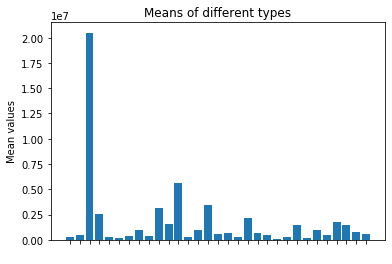

<Figure size 36000x36000 with 0 Axes>

In [11]:
# Grouping data by type and calculating their means

grouped_data=data.groupby("type")
mean = grouped_data.mean()
mean = mean.reset_index()

# Displaying the bar graph

plt.bar(mean.type, mean.price)
plt.title('Means of different types')
plt.ylabel('Mean values')
plt.xticks(mean.type, " ")
plt.figure(figsize=(500,500))
plt.show()

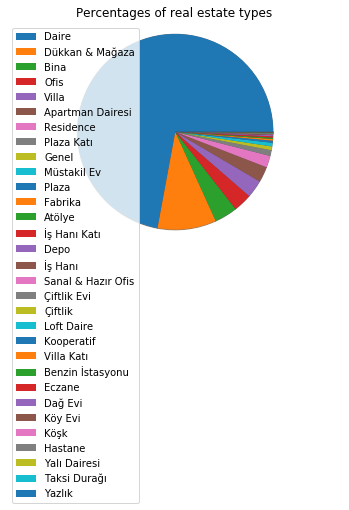

In [12]:
# Storing the number of different types 

real_estate_types = data['type'].value_counts()

# converting real_estate_types to data frame and assigning new names to the columns

df_value_counts = pd.DataFrame(real_estate_types)
df_value_counts = df_value_counts.reset_index()

# change column names

df_value_counts.columns = ['type', 'counts for type'] 

labels = df_value_counts['type']
patches, texts = plt.pie(df_value_counts['counts for type'],shadow=True,radius = 10, center = (5,5))
plt.legend(patches, labels, loc="best") 
plt.title("Percentages of real estate types")
plt.axis('equal')
plt.show()

In [13]:
# At this point, it is decided to work with "daire" rows 

data = data.loc[(data['type'] == 'Daire')].copy()

In [14]:
# Rental data frame is obtained by filtering based on price values

rental = data.loc[(data['price'] <= 40000)].copy()

# There is a jump from 160 TL to 350 TL in rental data. Thus; the values above 160 TL is kept and remanings discarded

rental = rental.loc[(data['price'] > 160)].copy()
rental.describe()

,lat,lng,price,year,month
count,4097.000000,4097.000000,4097.000000,4097.0,4097.000000
mean,39.895960,32.824796,2615.361240,2019.0,5.831340
std,0.042876,0.076587,3309.905744,0.0,0.425177
min,39.546272,31.921420,350.000000,2019.0,4.000000
25%,39.872281,32.819037,1150.000000,2019.0,6.000000
50%,39.893905,32.840055,1600.000000,2019.0,6.000000
75%,39.914287,32.866900,2750.000000,2019.0,6.000000
max,40.466499,33.033717,39000.000000,2019.0,7.000000


In [15]:
# For sale entities are kept in "data" data frame and descriptive statistics are shown

data = data.loc[(data['price'] > 40000)].copy()

In [16]:
# Hypothesis test is constructed to check rental and for sale data have similar distributions

stats.ks_2samp(rental.price, data.price)

# Since pvalue is less than .05, HO is rejected meaning that they have different distributions and decided to study for sale entities

Ks_2sampResult(statistic=1.0, pvalue=0.0)

# Outlier Analysis

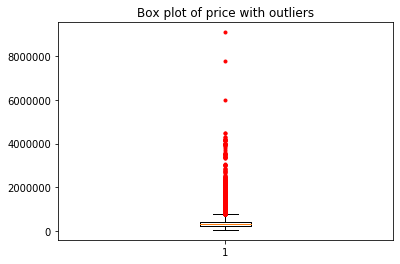

In [17]:
# Plotting box plot based on price attribute

plt.boxplot(data["price"], sym= "r.")
plt.title("Box plot of price with outliers")
plt.show()

In [18]:
# The highest 3 entities are discarded since they are not "daire" but "komple bina"

filter = (data['price'] < 6000000)
data =data.loc[filter].copy()
data.drop('type', axis='columns',inplace=True)

In [19]:
# Changing the type of m2 to integer 

data['m2'] = data['m2'].astype(int) 

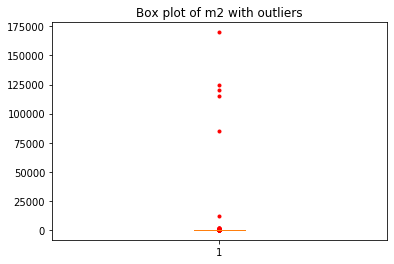

In [20]:
# Plotting box plot based on m2 attribute

plt.boxplot(data["m2"], sym= "r.")
plt.title("Box plot of m2 with outliers")
plt.show()

In [21]:
# The ones which have larger values than 850 m2 are analyzed and the ones that are not "daire" discarded

data = data[(data.m2 != 850) & (data.m2 != 950) & (data.m2 != 1200) &(data.m2 != 1300)].copy()

In [22]:
data.describe()

,lat,lng,m2,price,year,month
count,40815.000000,40815.000000,40815.000000,4.081500e+04,40815.000000,40815.000000
mean,39.923409,32.795025,162.807963,3.555601e+05,2018.999853,5.807620
std,0.069012,0.116545,1395.336507,2.619909e+05,0.012124,0.465959
min,38.936092,31.900515,1.000000,4.000100e+04,2018.000000,1.000000
25%,39.878736,32.788004,115.000000,2.040000e+05,2019.000000,6.000000
50%,39.915595,32.829257,131.000000,2.950000e+05,2019.000000,6.000000
75%,39.974928,32.859106,170.000000,4.250000e+05,2019.000000,6.000000
max,40.506636,33.545652,170000.000000,4.500000e+06,2019.000000,12.000000


In [23]:
# Noisy data based m2 values are corrected by dividing 10, 100 and 1000.

data1 = data.loc[(data['m2'] >= 1000) & (data['m2'] <= 1500)].copy()
data1['m2'] = data1['m2'] / 10

data2 = data.loc[(data['m2'] >= 12000) & (data['m2'] <= 85000)].copy()
data2['m2'] = data2['m2'] / 100

data3 = data.loc[(data['m2'] >= 115000)].copy()
data3['m2'] = data3['m2'] / 1000

filter1 = (data['m2'] < 850)
data =data.loc[filter1].copy()

# data is obtained after dropping and correcting the noisy m2 values 

data = data.append([data1, data2, data3], ignore_index=True)

data.describe()

,lat,lng,m2,price,year,month
count,40815.000000,40815.000000,40815.000000,4.081500e+04,40815.000000,40815.000000
mean,39.923409,32.795025,147.225925,3.555601e+05,2018.999853,5.807620
std,0.069012,0.116545,55.756103,2.619909e+05,0.012124,0.465959
min,38.936092,31.900515,1.000000,4.000100e+04,2018.000000,1.000000
25%,39.878736,32.788004,115.000000,2.040000e+05,2019.000000,6.000000
50%,39.915595,32.829257,130.000000,2.950000e+05,2019.000000,6.000000
75%,39.974928,32.859106,170.000000,4.250000e+05,2019.000000,6.000000
max,40.506636,33.545652,850.000000,4.500000e+06,2019.000000,12.000000


In [24]:
# The ones with less than 30 m2 values are ananlyzed and those are dropped.

filter2 = (data['m2'] > 30)
data =data.loc[filter2].copy()
data.describe()

,lat,lng,m2,price,year,month
count,40797.000000,40797.000000,40797.000000,4.079700e+04,40797.000000,40797.000000
mean,39.923395,32.795019,147.285760,3.555927e+05,2018.999853,5.807755
std,0.069017,0.116554,55.695103,2.620152e+05,0.012126,0.465793
min,38.936092,31.900515,33.000000,4.000100e+04,2018.000000,1.000000
25%,39.878727,32.788010,115.000000,2.050000e+05,2019.000000,6.000000
50%,39.915546,32.829257,130.000000,2.950000e+05,2019.000000,6.000000
75%,39.974925,32.859106,170.000000,4.250000e+05,2019.000000,6.000000
max,40.506636,33.545652,850.000000,4.500000e+06,2019.000000,12.000000


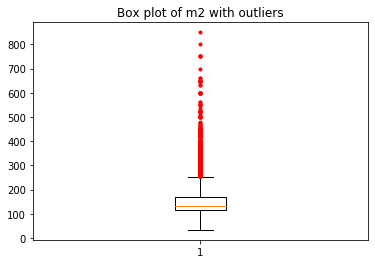

In [25]:
# After eliminating noisy data, box plot is constructed based on m2 values.

plt.boxplot(data["m2"], sym= "r.")
plt.title("Box plot of m2 with outliers")
plt.show()

In [26]:
# Pearson correlation matrix is obtained

corr_matrix=data.corr(method="pearson")
corr_matrix

,lat,lng,m2,price,year,month
lat,1.000000,0.347802,-0.037553,-0.159749,0.006817,-0.095180
lng,0.347802,1.000000,-0.030646,0.006027,0.006852,0.028098
m2,-0.037553,-0.030646,1.000000,0.600142,-0.013512,0.018782
price,-0.159749,0.006027,0.600142,1.000000,-0.011426,0.025553
year,0.006817,0.006852,-0.013512,-0.011426,1.000000,-0.148214
month,-0.095180,0.028098,0.018782,0.025553,-0.148214,1.000000


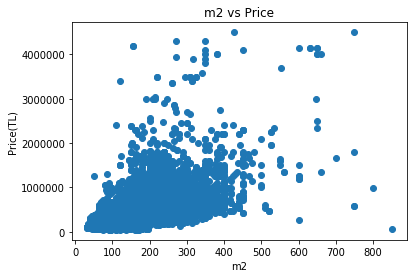

In [27]:
# Scatter plot of m2 s Price is shown

plt.scatter(data['m2'],data['price'])
plt.title('m2 vs Price')
plt.xlabel('m2')
plt.ylabel('Price(TL)')
plt.show()

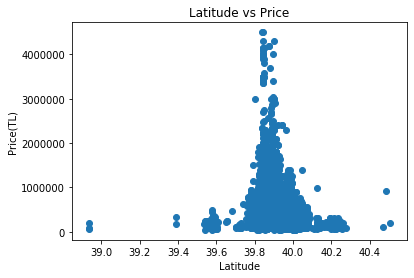

In [28]:
# Scatter plot of Latitude vs Price is shown

plt.scatter(data['lat'],data['price'])
plt.title('Latitude vs Price')
plt.xlabel('Latitude')
plt.ylabel('Price(TL)')
plt.show()

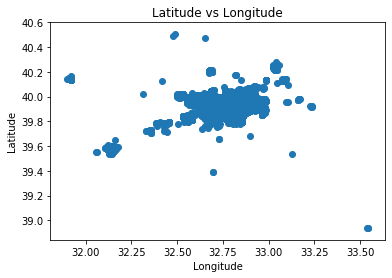

In [29]:
# Scatter plot of Latitude vs Longitude is shown

plt.scatter(data['lng'],data['lat'])
plt.title('Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

anderson:  2317.151452271006 [0.576 0.656 0.787 0.918 1.092] [15.  10.   5.   2.5  1. ]


(array([3.3451e+04, 6.1750e+03, 7.9900e+02, 2.3500e+02, 5.3000e+01,
        3.2000e+01, 1.2000e+01, 1.6000e+01, 1.1000e+01, 1.3000e+01]),
 array([  40001. ,  486000.9,  932000.8, 1378000.7, 1824000.6, 2270000.5,
        2716000.4, 3162000.3, 3608000.2, 4054000.1, 4500000. ]),
 <a list of 10 Patch objects>)

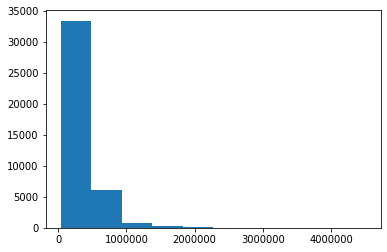

In [30]:
# Anderson normality test is done

print("anderson: ", *stats.anderson(data["price"], dist='norm'))

# Histogram plot of price values are shown

plt.hist(data["price"])

In [31]:
# Hypothesis test for entities after April 2019 and before it is constructed
# Since they are unpaired 2 groups, we can conduct Mann-Whitney-U test.
# H0 : first_quarter(mean) = second_quarter(mean)(Sample means are the same)
# H1 : first_quarter mean and second_quarter mean are different

first_quarter = data.loc[(data['month'] >= 4) & (data['month'] <= 7)].copy()
second_quarter = data.loc[(data['month'] < 4) | (data['month'] > 7)].copy()

stats.mannwhitneyu(x=first_quarter.price, y=second_quarter.price)

MannwhitneyuResult(statistic=531485.0, pvalue=0.10730773471280575)

Lambda value used for Transformation: -0.12668507998508993


,lat,lng,m2,price,year,month,price_m2
0,39.960691,32.984202,137.0,148000.0,2019,6,4.635446
1,39.960973,32.870175,95.0,299000.0,2019,6,5.048232
2,39.830144,32.733513,47.0,274000.0,2019,6,5.261973
3,40.042987,32.899883,205.0,420000.0,2019,6,4.889191
4,39.791440,32.854857,160.0,390000.0,2019,6,4.954592


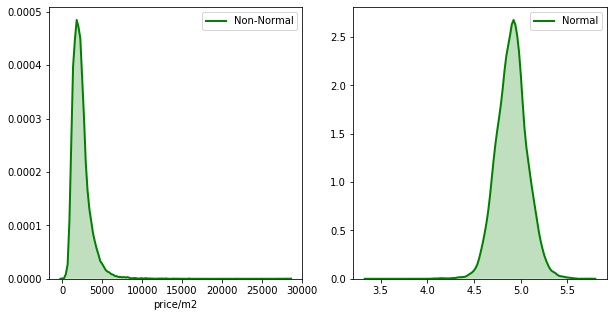

In [32]:
# Data3 is obtained that contain m2/Price values

data3 = data.copy()
data3['price/m2'] = data.price / data.m2

#transform training data & save lambda value 

fitted_data, fitted_lambda = stats.boxcox(data3['price/m2']) 

# creating axes to draw plots 

fig, ax = plt.subplots(1, 2) 
  
# plotting the original data(non-normal) and fitted data (normal) 
 
sns.distplot(data3['price/m2'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
  
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]) 
  
# adding legends to the subplots 

plt.legend(loc = "upper right") 
  
# rescaling the subplots 
fig.set_figheight(5) 
fig.set_figwidth(10) 
  
print(f"Lambda value used for Transformation: {fitted_lambda}") 

# Normalized data is obtained by transforming the data3

normalized_data3 = data.copy()
normalized_data3['price_m2'] = fitted_data
normalized_data3.head()

Lambda value used for Transformation: -0.17385549808318235


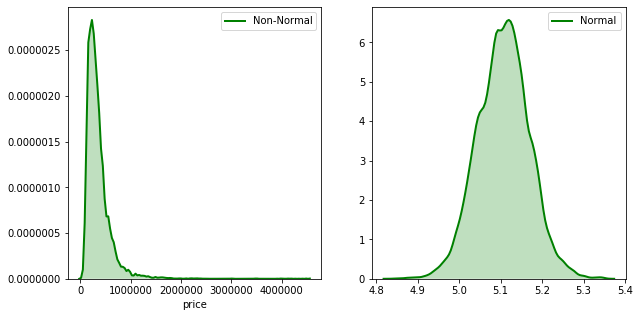

In [33]:
# Data is normalized

fitted_data, fitted_lambda = stats.boxcox(data['price']) 

# creating axes to draw plots 

fig, ax = plt.subplots(1, 2) 
  
# plotting the original data(non-normal) and  fitted data (normal) 

sns.distplot(data['price'], hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Non-Normal", color ="green", ax = ax[0]) 
  
sns.distplot(fitted_data, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            label = "Normal", color ="green", ax = ax[1]) 
  
# adding legends to the subplots 

plt.legend(loc = "upper right") 
  
# rescaling the subplots 

fig.set_figheight(5) 
fig.set_figwidth(10) 
  
print(f"Lambda value used for Transformation: {fitted_lambda}") 

In [34]:
# Normalized data is obtained by transforming the data

normalized_data = data.copy()
normalized_data['price'] = fitted_data
normalized_data.head()

,lat,lng,m2,price,year,month
0,39.960691,32.984202,137.0,5.025909,2019,6
1,39.960973,32.870175,95.0,5.109458,2019,6
2,39.830144,32.733513,47.0,5.099631,2019,6
3,40.042987,32.899883,205.0,5.146313,2019,6
4,39.791440,32.854857,160.0,5.138460,2019,6


# K-means Clustering

Text(0, 0.5, 'Total Within Sum of Squares')

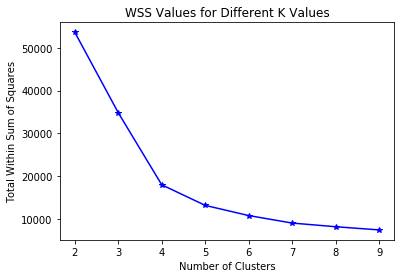

In [35]:
# For future work, data is scaled

standardscaler= StandardScaler()
scaled_data_3=standardscaler.fit_transform(normalized_data[normalized_data.columns[0:2]])
scaled_data_3=pd.DataFrame(scaled_data_3, columns=normalized_data.columns[0:2])

# Within Sum of Squares is calculated for different K values  

K=range(2,10)
wss=[]
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=23)
    df=normalized_data[normalized_data.columns[0:2]].copy()
    df["clusters"]=kmeans.fit_predict(scaled_data_3)
    kmeans = kmeans.fit(scaled_data_3)
    wss.append(kmeans.inertia_)
    
# WSS values for different K values are graphed

plt.plot(K, wss, "b*-")
plt.title('WSS Values for Different K Values')
plt.xlabel("Number of Clusters")
plt.ylabel("Total Within Sum of Squares")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

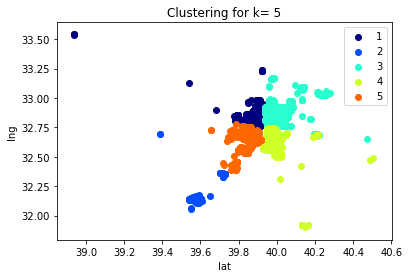

In [36]:
# K-means clustering is done for k value of 5 and it is visualized

kmeans = KMeans(n_clusters=5, random_state=23)
df=normalized_data[normalized_data.columns[0:2]].copy()
df["clusters"]=kmeans.fit_predict(scaled_data_3)
kmeans = kmeans.fit(scaled_data_3)

n_clusters=5
fig, ax = plt.subplots()
cmap = plt.cm.get_cmap('jet')
for i, clusters in df.groupby('clusters'):
    _ = ax.scatter(clusters['lat'], clusters['lng'], c=cmap(i/n_clusters), label=i+1)
ax.legend()

plt.title( "Clustering for k= " +str("5") )
plt.xlabel("lat")
plt.ylabel("lng")
plt.show()

## Hypothesis Testing for Clustered Data(Based on Lat, Long)

In [37]:
# Based on the clusters made above, hypothesis test is constructed for lat and lng values

# H0: All clusters have same mean
# H1: At least one cluster's mean is different

normalized_data['cluster_labels'] = kmeans.labels_

clus_1 = normalized_data.loc[(normalized_data['cluster_labels'] == 0 )].copy()
clus_2 = normalized_data.loc[(normalized_data['cluster_labels'] == 1 )].copy()
clus_3 = normalized_data.loc[(normalized_data['cluster_labels'] == 2 )].copy()
clus_4 = normalized_data.loc[(normalized_data['cluster_labels'] == 3 )].copy()
clus_5 = normalized_data.loc[(normalized_data['cluster_labels'] == 4 )].copy()

normalized_data['cluster_labels'].describe()

fscore, pvalue = stats.f_oneway(clus_1.price, clus_2.price, clus_3.price, clus_4.price, clus_5.price)
print("f-score = {}, p-value = {}".format(fscore, pvalue))

f-score = 1234.2988667745392, p-value = 0.0


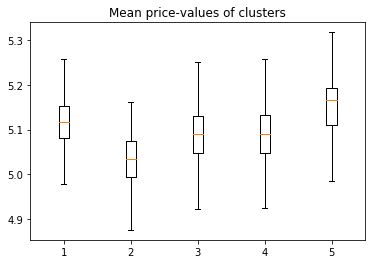

In [38]:
# Box plot of prices of 5 clusters are shown

plt.boxplot(clus_1.price,positions=[1],sym= "")
plt.boxplot(clus_2.price,positions=[2],sym= "")
plt.boxplot(clus_3.price,positions=[3],sym= "")
plt.boxplot(clus_4.price,positions=[4],sym= "")
plt.boxplot(clus_5.price,positions=[5],sym= "")
plt.title('Mean price-values of clusters')
plt.show()

In [39]:
# Based on the clusters made above, hypothesis test for price/m2 is constructed for lat and lng values

# H0: All clusters have same mean
# H1: At least one cluster's mean is different

normalized_data3['cluster_labels'] = kmeans.labels_


clus_1_3 = normalized_data3.loc[(normalized_data3['cluster_labels'] == 0 )].copy()
clus_2_3 = normalized_data3.loc[(normalized_data3['cluster_labels'] == 1 )].copy()
clus_3_3 = normalized_data3.loc[(normalized_data3['cluster_labels'] == 2 )].copy()
clus_4_3 = normalized_data3.loc[(normalized_data3['cluster_labels'] == 3 )].copy()
clus_5_3 = normalized_data3.loc[(normalized_data3['cluster_labels'] == 4 )].copy()

normalized_data['cluster_labels'].describe()

fscore, pvalue = stats.f_oneway(clus_1_3.price_m2, clus_2_3.price_m2, clus_3_3.price_m2, clus_4_3.price_m2, clus_5_3.price_m2)
print("f-score = {}, p-value = {}".format(fscore, pvalue))

f-score = 2032.4402866543396, p-value = 0.0


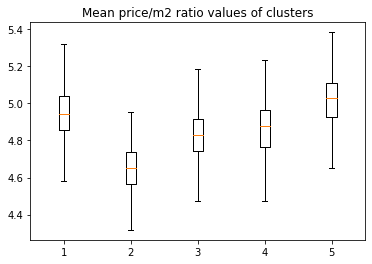

In [40]:
# Box plot of price/m2 ratios of 5 clusters are shown

plt.boxplot(clus_1_3.price_m2,positions=[1],sym= "")
plt.boxplot(clus_2_3.price_m2,positions=[2],sym= "")
plt.boxplot(clus_3_3.price_m2,positions=[3],sym= "")
plt.boxplot(clus_4_3.price_m2,positions=[4],sym= "")
plt.boxplot(clus_5_3.price_m2,positions=[5],sym= "")
plt.title('Mean price/m2 ratio values of clusters')
plt.show()

## Multiple Regression

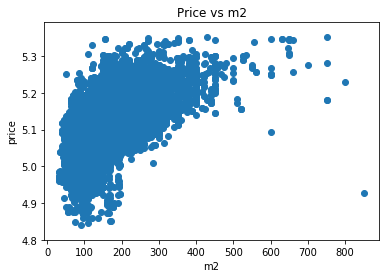

In [41]:
# Scatter plot for m2 and price is shown

plt.scatter(normalized_data['m2'],normalized_data['price'])
plt.title('Price vs m2')
plt.xlabel('m2')
plt.ylabel('price')
plt.show()

In [42]:
# Scaling is done

standardscaler= StandardScaler()
scaled_data_for_regression = standardscaler.fit_transform(normalized_data)
scaled_data_for_regression = pd.DataFrame(scaled_data_for_regression, columns=normalized_data.columns)

scaled_data_for_regression['cluster_labels'] = kmeans.labels_

clus_1 = scaled_data_for_regression.loc[(scaled_data_for_regression['cluster_labels'] == 0 )].copy()
clus_2 = scaled_data_for_regression.loc[(scaled_data_for_regression['cluster_labels'] == 1 )].copy()
clus_3 = scaled_data_for_regression.loc[(scaled_data_for_regression['cluster_labels'] == 2 )].copy()
clus_4 = scaled_data_for_regression.loc[(scaled_data_for_regression['cluster_labels'] == 3 )].copy()
clus_5 = scaled_data_for_regression.loc[(scaled_data_for_regression['cluster_labels'] == 4 )].copy()

In [43]:
# Train test split with stratified sampling

X1_train,X1_test,y1_train,y1_test = train_test_split(clus_1.loc[:, clus_1.columns != 'price'],clus_1.price,test_size=0.2,random_state=42)
X2_train,X2_test,y2_train,y2_test = train_test_split(clus_2.loc[:, clus_2.columns != 'price'],clus_2.price,test_size=0.2,random_state=42)
X3_train,X3_test,y3_train,y3_test = train_test_split(clus_3.loc[:, clus_3.columns != 'price'],clus_3.price,test_size=0.2,random_state=42)
X4_train,X4_test,y4_train,y4_test = train_test_split(clus_4.loc[:, clus_4.columns != 'price'],clus_4.price,test_size=0.2,random_state=42)
X5_train,X5_test,y5_train,y5_test = train_test_split(clus_5.loc[:, clus_5.columns != 'price'],clus_5.price,test_size=0.2,random_state=42)

X_train = X1_train.append([X2_train, X3_train, X4_train, X5_train])
X_test = X1_test.append([X2_test, X3_test, X4_test, X5_test])
y_train = y1_train.append([y2_train, y3_train, y4_train, y5_train])
y_test = y1_test.append([y2_test, y3_test, y4_test, y5_test])
                        
X_train.describe()

,lat,lng,m2,year,month,cluster_labels
count,32635.000000,32635.000000,32635.000000,32635.000000,32635.000000,32635.000000
mean,0.001096,0.000807,0.002200,-0.000506,0.001835,1.351034
std,0.999549,0.998533,1.004615,1.020674,1.002848,1.403715
min,-14.305333,-7.674699,-2.052015,-82.453017,-10.321784,0.000000
25%,-0.647749,-0.059295,-0.579695,0.012128,0.412730,0.000000
50%,-0.113432,0.294811,-0.274458,0.012128,0.412730,2.000000
75%,0.746671,0.548931,0.407837,0.012128,0.412730,2.000000
max,8.173691,6.440301,12.617318,0.012128,13.294148,4.000000


In [44]:
# Dropping clusters_labels 

X_train.drop('cluster_labels', axis='columns',inplace=True)
X_test.drop('cluster_labels', axis='columns',inplace=True)

In [45]:
# prepare the cross-validation procedure

cv = KFold(n_splits=3, random_state=1, shuffle=True)

#model initiation

model = LinearRegression()

#train data is fit into the model

model.fit(X_train, y_train)

# Make predictions

expected = y_test
predicted = model.predict(X_test)

# Summarize the fit of the model

mse = np.mean((predicted-expected)**2)
print(model.intercept_, model.coef_, mse, "\n")

R2 = r2_score(expected,predicted)
print("R squared value is ", R2)

model.get_params()

# Evaluate model with Kfold cross validation

scores = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1)

# report performance

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

-0.004734927491289327 [-0.1820135   0.13824804  0.60662713  0.00426786  0.00956028] 0.5855219339286768 

R squared value is  0.39429554726451754
Accuracy: 0.407 (0.004)


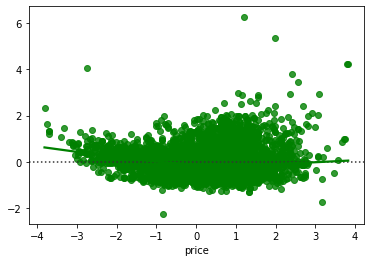

In [46]:
# Residuals are graphed

sns.residplot(x=expected, y=predicted, lowess=True, color="g")

## Classification

In [47]:
# Encoded as categorical by using equal-width partitioning

data['labeled_lat']=pd.cut(data['lat'],17,labels=range(0,17))
data['labeled_lng']=pd.cut(data['lng'],17,labels=range(0,17))
data['labeled_m2']=pd.cut(data['m2'],17,labels=range(0,17))
data['labeled_price']=pd.cut(data['price'],17,labels=range(0,17))

data.head()

,lat,lng,m2,price,year,month,labeled_lat,labeled_lng,labeled_m2,labeled_price
0,39.960691,32.984202,137.0,148000.0,2019,6,11,11,2,0
1,39.960973,32.870175,95.0,299000.0,2019,6,11,10,1,0
2,39.830144,32.733513,47.0,274000.0,2019,6,9,8,0,0
3,40.042987,32.899883,205.0,420000.0,2019,6,11,10,3,1
4,39.791440,32.854857,160.0,390000.0,2019,6,9,9,2,1


In [48]:
# Select columns ['year', 'month', lat', 'lng', 'm2'] for classification
X2 = data.iloc[:,4:10]

# Select column ['price'] for classification
y2 = data.iloc[:,-1]

In [49]:
# Based on price labels train test split is made

X2_0 = X2.loc[(X2['labeled_price'] == 0)].copy()
X2_1 = X2.loc[(X2['labeled_price'] == 1)].copy()
X2_2 = X2.loc[(X2['labeled_price'] == 2)].copy()
X2_3 = X2.loc[(X2['labeled_price'] == 3)].copy()
X2_4 = X2.loc[(X2['labeled_price'] == 4)].copy()
X2_5 = X2.loc[(X2['labeled_price'] == 5)].copy()
X2_6 = X2.loc[(X2['labeled_price'] == 6)].copy()
X2_7 = X2.loc[(X2['labeled_price'] == 7)].copy()
X2_8 = X2.loc[(X2['labeled_price'] == 8)].copy()
X2_9 = X2.loc[(X2['labeled_price'] == 9)].copy()
X2_10 = X2.loc[(X2['labeled_price'] == 10)].copy()
X2_11 = X2.loc[(X2['labeled_price'] == 11)].copy()
X2_12 = X2.loc[(X2['labeled_price'] == 12)].copy()
X2_13 = X2.loc[(X2['labeled_price'] == 13)].copy()
X2_14 = X2.loc[(X2['labeled_price'] == 14)].copy()
X2_15 = X2.loc[(X2['labeled_price'] == 15)].copy()
X2_16 = X2.loc[(X2['labeled_price'] == 16)].copy()

y2_0 = y2.loc[(y2 == 0)].copy()
y2_1 = y2.loc[(y2 == 1)].copy()
y2_2 = y2.loc[(y2 == 2)].copy()
y2_3 = y2.loc[(y2 == 3)].copy()
y2_4 = y2.loc[(y2 == 4)].copy()
y2_5 = y2.loc[(y2 == 5)].copy()
y2_6 = y2.loc[(y2 == 6)].copy()
y2_7 = y2.loc[(y2 == 7)].copy()
y2_8 = y2.loc[(y2 == 8)].copy()
y2_9 = y2.loc[(y2 == 9)].copy()
y2_10 = y2.loc[(y2 == 10)].copy()
y2_11 = y2.loc[(y2 == 11)].copy()
y2_12 = y2.loc[(y2 == 12)].copy()
y2_13 = y2.loc[(y2 == 13)].copy()
y2_14 = y2.loc[(y2 == 14)].copy()
y2_15 = y2.loc[(y2 == 15)].copy()
y2_16 = y2.loc[(y2 == 16)].copy()

X0_train_0,X0_test_0,y0_train_0,y0_test_0 = train_test_split(X2_0, y2_0, test_size=0.2,random_state=42)
X1_train_0,X1_test_0,y1_train_0,y1_test_0 = train_test_split(X2_1, y2_1, test_size=0.2,random_state=42)
X2_train_0,X2_test_0,y2_train_0,y2_test_0 = train_test_split(X2_2, y2_2, test_size=0.2,random_state=42)
X3_train_0,X3_test_0,y3_train_0,y3_test_0 = train_test_split(X2_3, y2_3, test_size=0.2,random_state=42)
X4_train_0,X4_test_0,y4_train_0,y4_test_0 = train_test_split(X2_4, y2_4, test_size=0.2,random_state=42)
X5_train_0,X5_test_0,y5_train_0,y5_test_0 = train_test_split(X2_5, y2_5, test_size=0.2,random_state=42)
X6_train_0,X6_test_0,y6_train_0,y6_test_0 = train_test_split(X2_6, y2_6, test_size=0.2,random_state=42)
X7_train_0,X7_test_0,y7_train_0,y7_test_0 = train_test_split(X2_7, y2_7, test_size=0.2,random_state=42)
X8_train_0,X8_test_0,y8_train_0,y8_test_0 = train_test_split(X2_8, y2_8, test_size=0.2,random_state=42)
X9_train_0,X9_test_0,y9_train_0,y9_test_0 = train_test_split(X2_9, y2_9, test_size=0.2,random_state=42)
X10_train_0,X10_test_0,y10_train_0,y10_test_0 = train_test_split(X2_10, y2_10, test_size=0.2,random_state=42)
X11_train_0,X11_test_0,y11_train_0,y11_test_0 = train_test_split(X2_11, y2_11, test_size=0.2,random_state=42)
X12_train_0,X12_test_0,y12_train_0,y12_test_0 = train_test_split(X2_12, y2_12, test_size=0.2,random_state=42)
X13_train_0,X13_test_0,y13_train_0,y13_test_0 = train_test_split(X2_13, y2_13, test_size=0.2,random_state=42)
X14_train_0,X14_test_0,y14_train_0,y14_test_0 = train_test_split(X2_14, y2_14, test_size=0.2,random_state=42)
X15_train_0,X15_test_0,y15_train_0,y15_test_0 = train_test_split(X2_15, y2_15, test_size=0.2,random_state=42)
X16_train_0,X16_test_0,y16_train_0,y16_test_0 = train_test_split(X2_16, y2_16, test_size=0.2,random_state=42)

X_train = X0_train_0.append([X1_train_0,X2_train_0, X3_train_0, X4_train_0, X5_train_0,X6_train_0, X7_train_0, X8_train_0,X9_train_0, X10_train_0, X11_train_0, X12_train_0, X13_train_0, X14_train_0, X15_train_0,X16_train_0])
X_test = X0_test_0.append([X1_test_0,X2_test_0, X3_test_0, X4_test_0, X5_test_0,X6_test_0, X7_test_0, X8_test_0,X9_test_0, X10_test_0, X11_test_0, X12_test_0, X13_test_0, X14_test_0, X15_test_0,X16_test_0])
y_train = y0_train_0.append([y1_train_0,y2_train_0, y3_train_0, y4_train_0, y5_train_0,y6_train_0, y7_train_0, y8_train_0,y9_train_0, y10_train_0, y11_train_0, y12_train_0, y13_train_0, y14_train_0, y15_train_0,y16_train_0])
y_test = y0_test_0.append([y1_test_0,y2_test_0, y3_test_0, y4_test_0, y5_test_0,y6_test_0, y7_test_0, y8_test_0,y9_test_0, y10_test_0, y11_test_0, y12_test_0, y13_test_0, y14_test_0, y15_test_0,y16_test_0])
                          
# From X_train and X_test labeled_price column is dropped

X_train.drop('labeled_price', axis='columns',inplace=True)
X_test.drop('labeled_price', axis='columns',inplace=True)                       

# prepare the cross-validation procedure

cv = KFold(n_splits=20, random_state=1, shuffle=True)

# Decision Tree Model Building

classification_model = DecisionTreeClassifier(criterion='entropy') 
classification_model.fit(X_train,y_train)
y_pred_train = classification_model.predict(X_train)

print('train accuracy: ', metrics.accuracy_score(y_train, y_pred_train))

y_pred_test = classification_model.predict(X_test)

print('test accuracy: ', metrics.accuracy_score(y_test, y_pred_test))

# Evaluate model with Kfold cross validation

scores = cross_val_score(classification_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

# report performance

print('weighted-f1: ', f1_score(y_test, y_pred_test, average='weighted'))
print('micro-f1: ', f1_score(y_test, y_pred_test, average='micro'))

pd.DataFrame(metrics.confusion_matrix(y_pred_test, y_test))

train accuracy:  0.6863201765138515
test accuracy:  0.6836497244335579
Accuracy: 0.680 (0.013)
weighted-f1:  0.6637680117391987
micro-f1:  0.6836497244335579


C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,3522,877,46,4,0,1,0,0,0,0,0,0,1,0,0,0,0
1,734,1920,539,87,47,12,9,1,5,0,1,1,0,0,1,1,1
2,8,61,104,42,14,8,8,2,1,1,0,0,1,2,0,0,0
3,0,4,10,30,16,5,1,1,0,1,0,0,0,0,0,0,0
4,1,0,2,5,4,2,2,0,1,0,1,0,0,0,0,0,0
5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


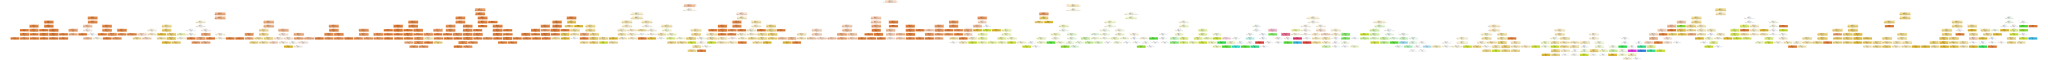

In [50]:
# Graphing Decision Tree

model6_data = tree.export_graphviz(classification_model, out_file=None, filled=True)
graph = graphviz.Source(model6_data)
graph